In [1]:
%load_ext autoreload
%autoreload 2

import os 
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', 500)
pd.set_option('display.width', 2000)

from grid_automate import (root_task, all_runs_csv, get_df_configs_from_paths, 
                           get_seq_4_epochs, calc_media_scarti, plot_scarto, plot_curves_vs_features, get_color,
                          get_data_points_degrees_relative_difference, get_plot_data)
from grid_automate import (mask_init_ws, mask_model, mask_architecture, 
mask_dataset, mask_cm_exp, mask_nodi, mask_ngrafi, mask_loss, mask_adj_norm, 
show_selection, extract_data_from_mask, mask_pER)

from config_valid import GraphType, get_dataset_trial_string, get_model_trial_string

In [2]:
head_df_paths = pd.read_csv(all_runs_csv)
head_df_paths

,folders
0,/home/daniele/Documenti/Progetti/Networks/Embednet/output_plots/autoencoder/8/ER__[01]_Classi-1_nodi300_grafiX20___#__AE_CM______§1-128-8§_______ELU+RELU__grphnorm__-xavier_normal___#__lr0010003999999999999_ADAMW_BCELoss
1,/home/daniele/Documenti/Progetti/Networks/Embednet/output_plots/autoencoder/8/ER__[09]_Classi-1_nodi300_grafiX20___#__AE_CM______§1-16-2§________ELU+RELU__grphnorm__-xavier_normal__UNnorm_adj_#__lr00005012_ADAMW_BCELoss
2,/home/daniele/Documenti/Progetti/Networks/Embednet/output_plots/autoencoder/8/ER__[01]_Classi-1_nodi300_grafiX30___#__AE_CM______§1-32-8§________ELU+RELU__grphnorm__-xavier_normal___#__lr0010003_ADAMW_BCELoss
3,/home/daniele/Documenti/Progetti/Networks/Embednet/output_plots/autoencoder/8/ER__[01]_Classi-1_nodi30__grafiX30___#__AE_CM______§1-32-16§_______ELU+RELU__grphnorm__-eye________#__lr00007_ADAMW_BCELoss
4,/home/daniele/Documenti/Progetti/Networks/Embednet/output_plots/autoencoder/8/CM__[-05]_Classi-1_nodi800_grafiX40___#__AE_CM______§1-8-4§_________ELU+RELU__grphnorm__-xavier_normal___#__lr00001_ADAMW_BCELoss
...,...
977,/home/daniele/Documenti/Progetti/Networks/Embednet/output_plots/autoencoder/8/ER__[01]_Classi-1_nodi300_grafiX100__#__AE_CM______§1-16-2§________ELU+RELU__grphnorm__-xavier_normal___#__lr00005007_ADAMW_BCELoss
978,/home/daniele/Documenti/Progetti/Networks/Embednet/output_plots/autoencoder/8/ER__[07]_Classi-1_nodi300_grafiX100__#__AE_CM______§1-16-2§________ELU+RELU__grphnorm__-xavier_normal__UNnorm_adj_#__lr00005012_ADAMW_BCELoss
979,/home/daniele/Documenti/Progetti/Networks/Embednet/output_plots/autoencoder/8/ER__[025]_Classi-1_nodi20__grafiX50___#__AE_fullMLP_CM_§128-128§_______ELU+RELU__grphnorm__-___________#__lr000025_ADAMW_BCELoss
980,/home/daniele/Documenti/Progetti/Networks/Embednet/output_plots/autoencoder/8/ER__[01]_Classi-1_nodi300_grafiX20___#__AE_CM______§1-64-16-8§_____ELU+RELU__grphnorm__-xavier_normal__UNnorm_adj_#__lr00020007000000000002_ADAMW_BCELoss


In [3]:
df_out = get_df_configs_from_paths(head_df_paths)
#df_out

In [4]:
m_init_xavier =  mask_init_ws(df_out, 'xavier_normal')
m_aecm = mask_model(df_out, 'AE_CM')
m_erdos = mask_dataset(df_out, GraphType.ER)
m_nodi_300 = mask_nodi(df_out, (300,))
m_nodi_350 = mask_nodi(df_out, (350,))

m_pER_01 = mask_pER(df_out, 0.1)
m_pER_03 = mask_pER(df_out, 0.3)
m_pER_05 = mask_pER(df_out, 0.5)
m_pER_07 = mask_pER(df_out, 0.7)
m_pER_09 = mask_pER(df_out, 0.9)

m_arch_1_16_1 = mask_architecture(df_out, (1,16,1))
m_arch_1_16_2 = mask_architecture(df_out, (1,16,2))
m_arch_1_16_4 = mask_architecture(df_out, (1,16,4))
m_arch_1_16_8 = mask_architecture(df_out, (1,16,8))
m_arch_1_64_16_8 = mask_architecture(df_out, (1,64,16,8))


m_grafi_20 = mask_ngrafi(df_out, 20)
m_grafi_100 = mask_ngrafi(df_out, 100)


m_normalize_gcn_layer = mask_adj_norm(df_out)
m_UNnormalize_gcn_layer = ~m_normalize_gcn_layer

In [40]:
show_selection(head_df_paths, mask_base & m_pER_01 & m_arch_1_64_16_8)

,folders
38,/home/daniele/Documenti/Progetti/Networks/Embednet/output_plots/autoencoder/8/ER__[01]_Classi-1_nodi300_grafiX20___#__AE_CM______§1-64-16-8§_____ELU+RELU__grphnorm__-xavier_normal__UNnorm_adj_#__lr00020004_ADAMW_BCELoss
51,/home/daniele/Documenti/Progetti/Networks/Embednet/output_plots/autoencoder/8/ER__[01]_Classi-1_nodi300_grafiX20___#__AE_CM______§1-64-16-8§_____ELU+RELU__grphnorm__-xavier_normal__UNnorm_adj_#__lr00020006_ADAMW_BCELoss
93,/home/daniele/Documenti/Progetti/Networks/Embednet/output_plots/autoencoder/8/ER__[01]_Classi-1_nodi300_grafiX100__#__AE_CM______§1-64-16-8§_____ELU+RELU__grphnorm__-xavier_normal___#__lr00005004_ADAMW_BCELoss
111,/home/daniele/Documenti/Progetti/Networks/Embednet/output_plots/autoencoder/8/ER__[01]_Classi-1_nodi300_grafiX20___#__AE_CM______§1-64-16-8§_____ELU+RELU__grphnorm__-xavier_normal___#__lr00020005_ADAMW_BCELoss
116,/home/daniele/Documenti/Progetti/Networks/Embednet/output_plots/autoencoder/8/ER__[01]_Classi-1_nodi300_grafiX20___#__AE_CM______§1-64-16-8§_____ELU+RELU__grphnorm__-xavier_normal__UNnorm_adj_#__lr00020005_ADAMW_BCELoss
124,/home/daniele/Documenti/Progetti/Networks/Embednet/output_plots/autoencoder/8/ER__[01]_Classi-1_nodi300_grafiX100__#__AE_CM______§1-64-16-8§_____ELU+RELU__grphnorm__-xavier_normal__UNnorm_adj_#__lr00005004_ADAMW_BCELoss
128,/home/daniele/Documenti/Progetti/Networks/Embednet/output_plots/autoencoder/8/ER__[01]_Classi-1_nodi300_grafiX100__#__AE_CM______§1-64-16-8§_____ELU+RELU__grphnorm__-xavier_normal__UNnorm_adj_#__lr0000501_ADAMW_BCELoss
139,/home/daniele/Documenti/Progetti/Networks/Embednet/output_plots/autoencoder/8/ER__[01]_Classi-1_nodi300_grafiX20___#__AE_CM______§1-64-16-8§_____ELU+RELU__grphnorm__-xavier_normal___#__lr00020009000000000003_ADAMW_BCELoss
227,/home/daniele/Documenti/Progetti/Networks/Embednet/output_plots/autoencoder/8/ER__[01]_Classi-1_nodi300_grafiX100__#__AE_CM______§1-64-16-8§_____ELU+RELU__grphnorm__-xavier_normal__UNnorm_adj_#__lr00005005_ADAMW_BCELoss
234,/home/daniele/Documenti/Progetti/Networks/Embednet/output_plots/autoencoder/8/ER__[01]_Classi-1_nodi300_grafiX100__#__AE_CM______§1-64-16-8§_____ELU+RELU__grphnorm__-xavier_normal___#__lr00005007_ADAMW_BCELoss


In [11]:
mask_base = m_init_xavier & m_aecm & m_erdos & (m_nodi_300)  # | m_nodi_350)

mask_arch = m_arch_1_16_1 | m_arch_1_16_2 | m_arch_1_16_4 | m_arch_1_16_8
mask_grafi = m_grafi_20 | m_grafi_100

mask_overall_norm = mask_base & mask_arch & mask_grafi & m_normalize_gcn_layer
mask_overall_unnorm = mask_base & mask_arch & mask_grafi & m_UNnormalize_gcn_layer

mask_p01 = m_pER_01 & mask_base
mask_p03 = m_pER_03 & mask_base
mask_p05 = m_pER_05 & mask_base
mask_p07 = m_pER_07 & mask_base
mask_p09 = m_pER_09 & mask_base

mask_2Demb = mask_base & m_arch_1_16_2 & m_normalize_gcn_layer
mask_2Demb_UNnorm = mask_base & m_arch_1_16_2 & m_UNnormalize_gcn_layer
mask_4Demb = mask_base & m_arch_1_16_4 & m_normalize_gcn_layer
mask_4Demb_UNnorm = mask_base & m_arch_1_16_4 & m_UNnormalize_gcn_layer

mask_best1 = mask_p01 & m_normalize_gcn_layer #& m_arch_1_64_16_8

show_selection(head_df_paths, mask_overall_norm)
show_selection(head_df_paths, mask_best1)

,folders
0,/home/daniele/Documenti/Progetti/Networks/Embednet/output_plots/autoencoder/8/ER__[01]_Classi-1_nodi300_grafiX20___#__AE_CM______§1-128-8§_______ELU+RELU__grphnorm__-xavier_normal___#__lr0010003999999999999_ADAMW_BCELoss
2,/home/daniele/Documenti/Progetti/Networks/Embednet/output_plots/autoencoder/8/ER__[01]_Classi-1_nodi300_grafiX30___#__AE_CM______§1-32-8§________ELU+RELU__grphnorm__-xavier_normal___#__lr0010003_ADAMW_BCELoss
13,/home/daniele/Documenti/Progetti/Networks/Embednet/output_plots/autoencoder/8/ER__[01]_Classi-1_nodi300_grafiX20___#__AE_CM______§1-32-8§________ELU+RELU__grphnorm__-xavier_normal___#__lr0010007_ADAMW_BCELoss
25,/home/daniele/Documenti/Progetti/Networks/Embednet/output_plots/autoencoder/8/ER__[01]_Classi-1_nodi300_grafiX20___#__AE_CM______§1-16-1§________ELU+RELU__grphnorm__-xavier_normal___#__lr00005012_ADAMW_BCELoss
27,/home/daniele/Documenti/Progetti/Networks/Embednet/output_plots/autoencoder/8/ER__[01]_Classi-1_nodi300_grafiX100__#__AE_CM______§1-16-2§________ELU+RELU__grphnorm__-xavier_normal___#__lr00005001_ADAMW_BCELoss
33,/home/daniele/Documenti/Progetti/Networks/Embednet/output_plots/autoencoder/8/ER__[01]_Classi-1_nodi300_grafiX20___#__AE_CM______§1-128-8§_______ELU+RELU__grphnorm__-xavier_normal___#__lr0010001_ADAMW_BCELoss
35,/home/daniele/Documenti/Progetti/Networks/Embednet/output_plots/autoencoder/8/ER__[01]_Classi-1_nodi300_grafiX150__#__AE_CM______§1-8-8§_________ELU+RELU__grphnorm__-xavier_normal___#__lr000050006_ADAMW_BCELoss
43,/home/daniele/Documenti/Progetti/Networks/Embednet/output_plots/autoencoder/8/ER__[01]_Classi-1_nodi300_grafiX20___#__AE_CM______§1-32-8§________ELU+RELU__grphnorm__-xavier_normal___#__lr0010006_ADAMW_BCELoss
49,/home/daniele/Documenti/Progetti/Networks/Embednet/output_plots/autoencoder/8/ER__[01]_Classi-1_nodi300_grafiX50___#__AE_CM______§1-16-3§________ELU+RELU__grphnorm__-xavier_normal___#__lr00005004_ADAMW_BCELoss
56,/home/daniele/Documenti/Progetti/Networks/Embednet/output_plots/autoencoder/8/ER__[01]_Classi-1_nodi300_grafiX5____#__AE_CM______§1-64-64-16§____ELU+RELU__grphnorm__-xavier_normal___#__lr000801_ADAMW_BCELoss


In [17]:
tot_mask_xavier_ER_AE_CM__1_16_2__adjnorm_300_20 = m_init_xavier & m_erdos & m_aecm & m_arch_1_16_2 & m_nodi_300 & m_grafi_20 & m_normalize_gcn_layer
show_selection(head_df_paths, tot_mask_xavier_ER_AE_CM__1_16_2__adjnorm_300_20)

,folders
88,/home/daniele/Documenti/Progetti/Networks/Embednet/output_plots/autoencoder/8/ER__[09]_Classi-1_nodi300_grafiX20___#__AE_CM______§1-16-2§________ELU+RELU__grphnorm__-xavier_normal___#__lr00005012_ADAMW_BCELoss
377,/home/daniele/Documenti/Progetti/Networks/Embednet/output_plots/autoencoder/8/ER__[07]_Classi-1_nodi300_grafiX20___#__AE_CM______§1-16-2§________ELU+RELU__grphnorm__-xavier_normal___#__lr00005012_ADAMW_BCELoss
476,/home/daniele/Documenti/Progetti/Networks/Embednet/output_plots/autoencoder/8/ER__[05]_Classi-1_nodi300_grafiX20___#__AE_CM______§1-16-2§________ELU+RELU__grphnorm__-xavier_normal___#__lr00005012_ADAMW_BCELoss
613,/home/daniele/Documenti/Progetti/Networks/Embednet/output_plots/autoencoder/8/ER__[03]_Classi-1_nodi300_grafiX20___#__AE_CM______§1-16-2§________ELU+RELU__grphnorm__-xavier_normal___#__lr00005012_ADAMW_BCELoss
664,/home/daniele/Documenti/Progetti/Networks/Embednet/output_plots/autoencoder/8/ER__[01]_Classi-1_nodi300_grafiX20___#__AE_CM______§1-16-2§________ELU+RELU__grphnorm__-xavier_normal___#__lr00005012_ADAMW_BCELoss


# Get dimension data

In [34]:
mask = tot_mask_xavier_ER_AE_CM__1_16_2__adjnorm_300_20

In [40]:
def plott(mask, **kwargs):
    many_training_paths = head_df_paths[mask]
    many_training_configs = df_out[mask]

    plot_data = []
    for index, row in many_training_paths.iterrows():
        path = row.values[0]

        # carica gli array dei node emb dimension
        try:
            file_path = os.path.join(path, 'totale_node_dim.pkl')
            node_emb_arr = pd.read_pickle(file_path)
            node_emb_arr = [i for i in node_emb_arr if i != -1]
        except:
            print(f"file {file_path} non tovato")
            node_emb_arr = []

        #chiamo le altre variabili (feature)
        epoche = range(len(node_emb_arr))

        pER = many_training_configs.loc[index]['graph_dataset.list_p'][0]
        exp = many_training_configs.loc[index]['graph_dataset.list_exponents'][0]
        num_nodes = many_training_configs.loc[index]['graph_dataset.Num_nodes'][0]
        n_grafi = many_training_configs.loc[index]['graph_dataset.Num_grafi_per_tipo']
        neurons_layers = many_training_configs.loc[index]['model.GCNneurons_per_layer']

        num_layers = len(neurons_layers)
        total_neurons = sum(neurons_layers) 
        
        #def eval_label(lab):
        #    return eval(lab)
        
        lab = kwargs.get('label')

        plot_data.append({'x': epoche, 'pER': pER, 'num_nodes':num_nodes, 'n_grafi':n_grafi, 'num_layers':num_layers, 'total_neurons':total_neurons , 
                          'label': eval(lab), 'y': node_emb_arr})
    
    return plot_data
    
        

In [57]:
plot_best_1 = plott(mask_best1, label='total_neurons')

file /home/daniele/Documenti/Progetti/Networks/Embednet/output_plots/autoencoder/8/ER__[01]_Classi-1_nodi300_grafiX300__#__AE_CM______§1-16-4§________ELU+RELU__grphnorm__-xavier_normal_#__lr0005_ADAM_BCELoss/totale_node_dim.pkl non tovato
file /home/daniele/Documenti/Progetti/Networks/Embednet/output_plots/autoencoder/8/ER__[01]_Classi-1_nodi300_grafiX20___#__AE_CM______§1-16-2§________ELU+RELU__grphnorm__-xavier_normal___#__lr000050121_ADAMW_BCELoss/totale_node_dim.pkl non tovato


177


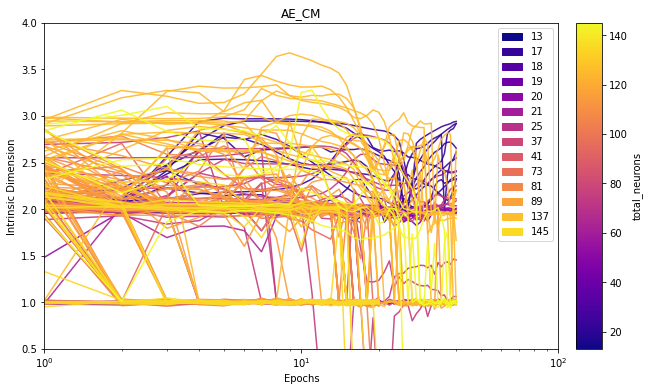

In [62]:
plot_curves_vs_features(plot_best_1, feature='total_neurons', titolo='AE_CM', x_title="Epochs", y_title="Intrinsic Dimension", x_lim=(1,100), y_lim=(0.5, 4.0), logx=True, alpha=0.9, labels=True) #, ax=ax[0][0])

In [65]:
many_training_configs = df_out[mask_best1]

/tmp/ipykernel_1516578/2407864888.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  many_training_configs ['num_neurons'] = many_training_configs ['model.GCNneurons_per_layer'].apply(lambda x: sum(x))


177


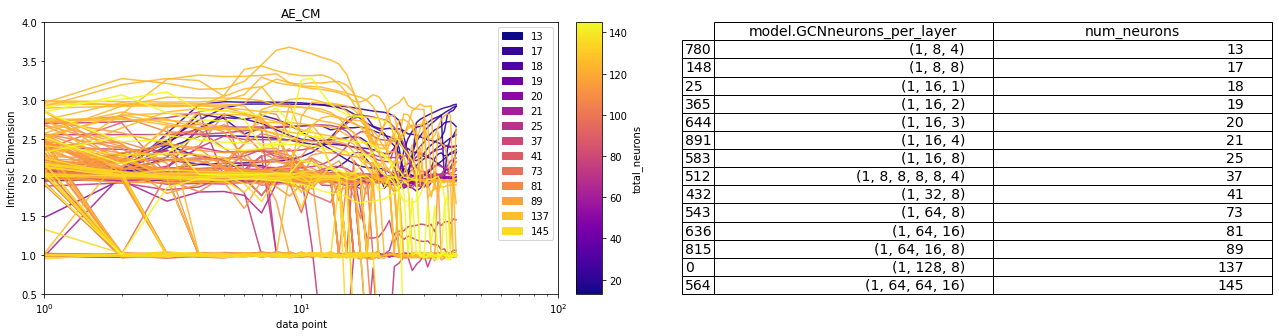

In [87]:
many_training_configs ['model.GCNneurons_per_layer']
many_training_configs ['num_neurons'] = many_training_configs ['model.GCNneurons_per_layer'].apply(lambda x: sum(x))
res_df = many_training_configs [['model.GCNneurons_per_layer','num_neurons']].sort_values('num_neurons').drop_duplicates()

fig = plt.figure(figsize=(22,5))

ax1 = fig.add_subplot(121)
plot_curves_vs_features(plot_best_1, feature='total_neurons', titolo='AE_CM', x_title="data point", y_title="Intrinsic Dimension", x_lim=(1,100), y_lim=(0.5, 4.0), logx=True, alpha=0.9, labels=True, ax=ax1)

ax2 = fig.add_subplot(122)
font_size=14
bbox=[0, 0, 1, 1]
ax2.axis('off')
mpl_table = ax2.table(cellText = res_df.values, rowLabels = res_df.index, bbox=bbox, colLabels=res_df.columns)
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)

In [18]:
plot_data_norm = plott(mask_overall_norm)
plot_data_unnorm = plott(mask_overall_unnorm) 
plot_data_p01 = plott(mask_p01)
plot_data_p03 = plott(mask_p03)
plot_data_p05 = plott(mask_p05)
plot_data_p07 = plott(mask_p07)
plot_data_p09 = plott(mask_p09)
pdata_2Demb = plott(mask_2Demb)
pdata_2Demb_UNnorm = plott(mask_2Demb_UNnorm)
pdata_4Demb = plott(mask_4Demb)
pdata_4Demb_UNnorm = plott(mask_4Demb_UNnorm)

file /home/daniele/Documenti/Progetti/Networks/Embednet/output_plots/autoencoder/8/ER__[001]_Classi-1_nodi300_grafiX20___#__AE_CM______§1-16-8§________ELU+RELU__grphnorm__-xavier_normal___#__lr000052_ADAMW_BCELoss/totale_node_dim.pkl non tovato
file /home/daniele/Documenti/Progetti/Networks/Embednet/output_plots/autoencoder/8/ER__[01]_Classi-1_nodi300_grafiX300__#__AE_CM______§1-16-4§________ELU+RELU__grphnorm__-xavier_normal_#__lr0005_ADAM_BCELoss/totale_node_dim.pkl non tovato
file /home/daniele/Documenti/Progetti/Networks/Embednet/output_plots/autoencoder/8/ER__[01]_Classi-1_nodi300_grafiX300__#__AE_CM______§1-16-4§________ELU+RELU__grphnorm__-xavier_normal_#__lr0005_ADAM_BCELoss/totale_node_dim.pkl non tovato


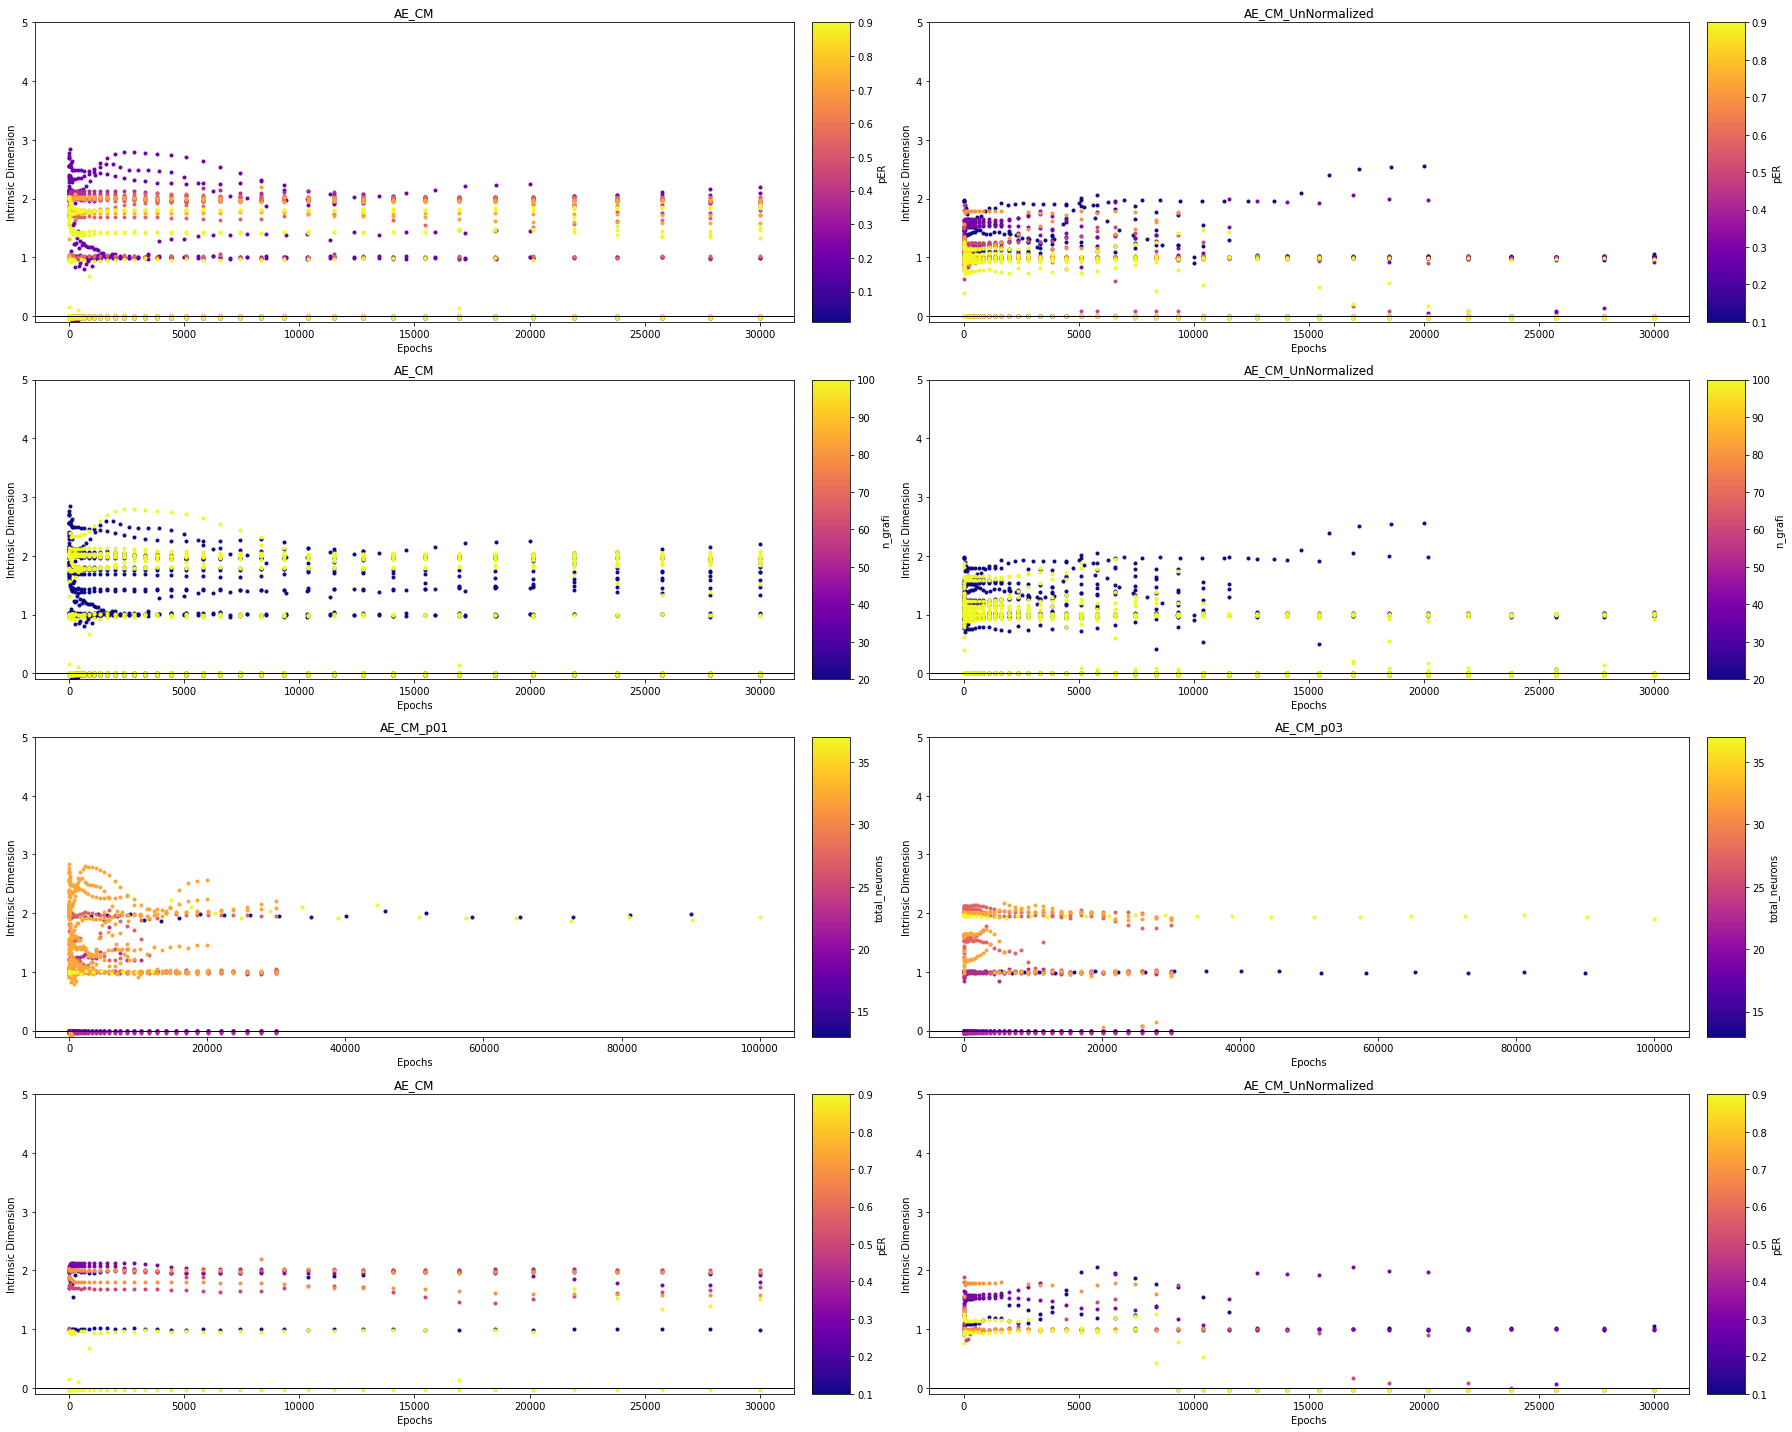

In [19]:
fig, ax = plt.subplots(4,2, figsize=(25,20))
x_title="Epochs"
y_title="Intrinsic Dimension"
plot_curves_vs_features(plot_data_norm, feature='pER', titolo='AE_CM', x_title=x_title, y_title=y_title, y_lim=(-0.1, 5.0), noline=True, ax=ax[0][0])
plot_curves_vs_features(plot_data_unnorm, feature='pER', titolo='AE_CM_UnNormalized', x_title=x_title, y_title=y_title, y_lim=(-0.1, 5.0), noline=True, ax=ax[0][1])

plot_curves_vs_features(plot_data_norm, feature='n_grafi', titolo='AE_CM', x_title=x_title, y_title=y_title, y_lim=(-0.1, 5.0), noline=True, ax=ax[1][0])
plot_curves_vs_features(plot_data_unnorm, feature='n_grafi', titolo='AE_CM_UnNormalized', x_title=x_title, y_title=y_title, y_lim=(-0.1, 5.0), noline=True, ax=ax[1][1])

plot_curves_vs_features(plot_data_p01, feature='total_neurons', titolo='AE_CM_p01', x_title=x_title, y_title=y_title, y_lim=(-0.1, 5.0), noline=True, ax=ax[2][0])
plot_curves_vs_features(plot_data_p03, feature='total_neurons', titolo='AE_CM_p03', x_title=x_title, y_title=y_title, y_lim=(-0.1, 5.0), noline=True, ax=ax[2][1])


plot_curves_vs_features(pdata_4Demb, feature='pER', titolo='AE_CM', x_title=x_title, y_title=y_title, y_lim=(-0.1, 5.0), noline=True, ax=ax[3][0])
plot_curves_vs_features(pdata_4Demb_UNnorm, feature='pER', titolo='AE_CM_UnNormalized', x_title=x_title, y_title=y_title, y_lim=(-0.1, 5.0), noline=True, ax=ax[3][1])

fig.tight_layout()

plt.show()

imparo a classificare le curve

Epoch [1/50], Loss: 1.0454
Epoch [2/50], Loss: 0.7935
Epoch [3/50], Loss: 0.1660
Epoch [4/50], Loss: 0.1435
Epoch [5/50], Loss: 0.1431
Epoch [6/50], Loss: 0.1417
Epoch [7/50], Loss: 0.1401
Epoch [8/50], Loss: 0.1386
Epoch [9/50], Loss: 0.1375
Epoch [10/50], Loss: 0.1368
Epoch [11/50], Loss: 0.1363
Epoch [12/50], Loss: 0.1358
Epoch [13/50], Loss: 0.1354
Epoch [14/50], Loss: 0.1351
Epoch [15/50], Loss: 0.1348
Epoch [16/50], Loss: 0.1344
Epoch [17/50], Loss: 0.1342
Epoch [18/50], Loss: 0.1342
Epoch [19/50], Loss: 0.1342
Epoch [20/50], Loss: 0.1342
Epoch [21/50], Loss: 0.1342
Epoch [22/50], Loss: 0.1342
Epoch [23/50], Loss: 0.1343
Epoch [24/50], Loss: 0.1343
Epoch [25/50], Loss: 0.1344
Epoch [26/50], Loss: 0.1344
Epoch [27/50], Loss: 0.1343
Epoch [28/50], Loss: 0.1343
Epoch [29/50], Loss: 0.1343
Epoch [30/50], Loss: 0.1343
Epoch [31/50], Loss: 0.1343
Epoch [32/50], Loss: 0.1343
Epoch [33/50], Loss: 0.1343
Epoch [34/50], Loss: 0.1343
Epoch [35/50], Loss: 0.1343
Epoch [36/50], Loss: 0.1343
E

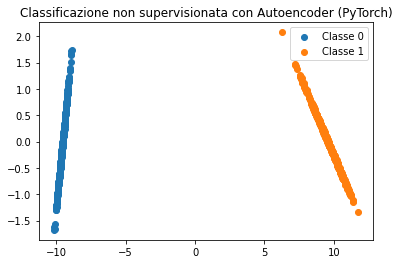

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim

# Genera dati di esempio
num_samples = 1000
num_features = 50
num_classes = 2

class_0 = np.random.normal(loc=0, scale=1, size=(num_samples // 2, num_features))
class_1 = np.random.normal(loc=5, scale=1, size=(num_samples // 2, num_features))
data = np.vstack([class_0, class_1])
labels = np.array([0] * (num_samples // 2) + [1] * (num_samples // 2))

# Normalizzazione dei dati
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

# Definizione del modello Autoencoder con PyTorch
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(num_features, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, num_features),
            nn.Tanh()  # Utilizziamo la funzione di attivazione Tanh per limitare l'output tra -1 e 1
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Creazione del modello e definizione della funzione di perdita e dell'ottimizzatore
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Addestramento del modello
num_epochs = 50
batch_size = 32
for epoch in range(num_epochs):
    for i in range(0, len(data_normalized), batch_size):
        inputs = torch.tensor(data_normalized[i:i+batch_size], dtype=torch.float)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Codifica dei dati
with torch.no_grad():
    encoded_data = model.encoder(torch.tensor(data_normalized, dtype=torch.float)).numpy()

# Visualizzazione della codifica tramite riduzione dimensionale (PCA)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
encoded_data_pca = pca.fit_transform(encoded_data)

# Visualizzazione delle classi
plt.scatter(encoded_data_pca[labels == 0, 0], encoded_data_pca[labels == 0, 1], label='Classe 0')
plt.scatter(encoded_data_pca[labels == 1, 0], encoded_data_pca[labels == 1, 1], label='Classe 1')
plt.legend()
plt.title('Classificazione non supervisionata con Autoencoder (PyTorch)')
plt.show()
